In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the CSV data
df = pd.read_csv('wandb_results.csv')

# Display basic info about the dataset
print("Dataset shape:", df.shape)
print("\nColumn names:")
for col in df.columns:
    print(f"  {col}")
    
print("\nFirst few rows:")
df.head()

Dataset shape: (20, 22)

Column names:
  train/global_step
  another-working-run - _step
  another-working-run - _step__MIN
  another-working-run - _step__MAX
  another-working-run - eval/rewards/correctness_reward_func/mean
  another-working-run - eval/rewards/correctness_reward_func/mean__MIN
  another-working-run - eval/rewards/correctness_reward_func/mean__MAX
  another-working-run - eval/rewards/numeric_reward_func/mean
  another-working-run - eval/rewards/numeric_reward_func/mean__MIN
  another-working-run - eval/rewards/numeric_reward_func/mean__MAX
  another-working-run - eval/rewards/length_penalty_reward_func/mean
  another-working-run - eval/rewards/length_penalty_reward_func/mean__MIN
  another-working-run - eval/rewards/length_penalty_reward_func/mean__MAX
  another-working-run - eval/rewards/correctness_reward_func/std
  another-working-run - eval/rewards/correctness_reward_func/std__MIN
  another-working-run - eval/rewards/correctness_reward_func/std__MAX
  another-worki

,train/global_step,another-working-run - _step,another-working-run - _step__MIN,another-working-run - _step__MAX,another-working-run - eval/rewards/correctness_reward_func/mean,another-working-run - eval/rewards/correctness_reward_func/mean__MIN,another-working-run - eval/rewards/correctness_reward_func/mean__MAX,another-working-run - eval/rewards/numeric_reward_func/mean,another-working-run - eval/rewards/numeric_reward_func/mean__MIN,another-working-run - eval/rewards/numeric_reward_func/mean__MAX,...,another-working-run - eval/rewards/length_penalty_reward_func/mean__MAX,another-working-run - eval/rewards/correctness_reward_func/std,another-working-run - eval/rewards/correctness_reward_func/std__MIN,another-working-run - eval/rewards/correctness_reward_func/std__MAX,another-working-run - eval/rewards/numeric_reward_func/std,another-working-run - eval/rewards/numeric_reward_func/std__MIN,another-working-run - eval/rewards/numeric_reward_func/std__MAX,another-working-run - eval/rewards/length_penalty_reward_func/std,another-working-run - eval/rewards/length_penalty_reward_func/std__MIN,another-working-run - eval/rewards/length_penalty_reward_func/std__MAX
0,11,329,329,329,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-2.301667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.178662,0.178662,0.178662
1,22,658,658,658,0.208333,0.208333,0.208333,0.041667,0.041667,0.041667,...,-2.014750,0.294628,0.294628,0.294628,0.058926,0.058926,0.058926,0.142246,0.142246,0.142246
2,33,987,987,987,0.416667,0.416667,0.416667,0.083333,0.083333,0.083333,...,-1.892667,0.589256,0.589256,0.589256,0.117851,0.117851,0.117851,0.138357,0.138357,0.138357
3,44,1316,1316,1316,0.625000,0.625000,0.625000,0.208333,0.208333,0.208333,...,-1.669583,0.883883,0.883883,0.883883,0.176777,0.176777,0.176777,0.236763,0.236763,0.236763
4,55,1645,1645,1645,1.250000,1.250000,1.250000,0.208333,0.208333,0.208333,...,-1.486417,1.767767,1.767767,1.767767,0.294628,0.294628,0.294628,0.356028,0.356028,0.356028


In [3]:
# Extract the relevant columns for plotting
# We'll use train/global_step as our x-axis
x_axis = df['train/global_step']

# Extract reward means and standard deviations
correctness_mean = df['another-working-run - eval/rewards/correctness_reward_func/mean']
correctness_std = df['another-working-run - eval/rewards/correctness_reward_func/std']

numeric_mean = df['another-working-run - eval/rewards/numeric_reward_func/mean']
numeric_std = df['another-working-run - eval/rewards/numeric_reward_func/std']

length_penalty_mean = df['another-working-run - eval/rewards/length_penalty_reward_func/mean']
length_penalty_std = df['another-working-run - eval/rewards/length_penalty_reward_func/std']

# Convert standard deviations to standard errors (std / sqrt(n))
# Sample size is 24
sample_size = 24
correctness_se = correctness_std / np.sqrt(sample_size)
numeric_se = numeric_std / np.sqrt(sample_size)
length_penalty_se = length_penalty_std / np.sqrt(sample_size)

print("Data ranges:")
print(f"Correctness mean: {correctness_mean.min():.3f} to {correctness_mean.max():.3f}")
print(f"Correctness SE: {correctness_se.min():.3f} to {correctness_se.max():.3f}")
print(f"Numeric mean: {numeric_mean.min():.3f} to {numeric_mean.max():.3f}")
print(f"Numeric SE: {numeric_se.min():.3f} to {numeric_se.max():.3f}")
print(f"Length penalty mean: {length_penalty_mean.min():.3f} to {length_penalty_mean.max():.3f}")
print(f"Length penalty SE: {length_penalty_se.min():.3f} to {length_penalty_se.max():.3f}")

Data ranges:
Correctness mean: 0.000 to 3.750
Correctness SE: 0.000 to 0.421
Numeric mean: 0.000 to 0.500
Numeric SE: 0.000 to 0.060
Length penalty mean: -2.302 to -0.494
Length penalty SE: 0.016 to 0.073


In [4]:
# Load and process LLC data
def load_llc_data():
    # Load the LLC CSV data
    df_llc = pd.read_csv('llc_results.csv')
    
    print("LLC dataset shape:", df_llc.shape)
    print("\nLLC column names:")
    for col in df_llc.columns:
        print(f"  {col}")
    
    print("\nFirst few LLC rows:")
    print(df_llc.head())
    
    return df_llc

# Extract LLC data for plotting
def extract_llc_data(df_llc):
    x_axis_llc = df_llc['step']
    llc_mean = df_llc['llc_mean']
    llc_std = df_llc['llc_std']
    
    # Convert standard deviation to standard error (same sample size as rewards)
    llc_se = llc_std / np.sqrt(sample_size)
    
    print(f"LLC data ranges:")
    print(f"LLC mean: {llc_mean.min():.3f} to {llc_mean.max():.3f}")
    print(f"LLC SE: {llc_se.min():.3f} to {llc_se.max():.3f}")
    print(f"LLC steps: {x_axis_llc.min()} to {x_axis_llc.max()} ({len(x_axis_llc)} data points)")
    
    return x_axis_llc, llc_mean, llc_se

# Load the LLC data (must run before other cells that reference LLC variables)
df_llc = load_llc_data()
x_axis_llc, llc_mean, llc_se = extract_llc_data(df_llc)

# Global variables for suspected phase transition regions
TRANSITION_REGIONS = [(44, 66), (88, 110), (187, 209)]
SHADE_COLOR = 'lightgray'
SHADE_ALPHA = 0.4

LLC dataset shape: (20, 3)

LLC column names:
  step
  llc_mean
  llc_std

First few LLC rows:
   step  llc_mean  llc_std
0    11      74.3      1.9
1    22      76.1      1.3
2    33      77.6      2.1
3    44      77.7      2.1
4    55      71.2      1.4
LLC data ranges:
LLC mean: 71.200 to 81.200
LLC SE: 0.184 to 1.470
LLC steps: 11 to 220 (20 data points)


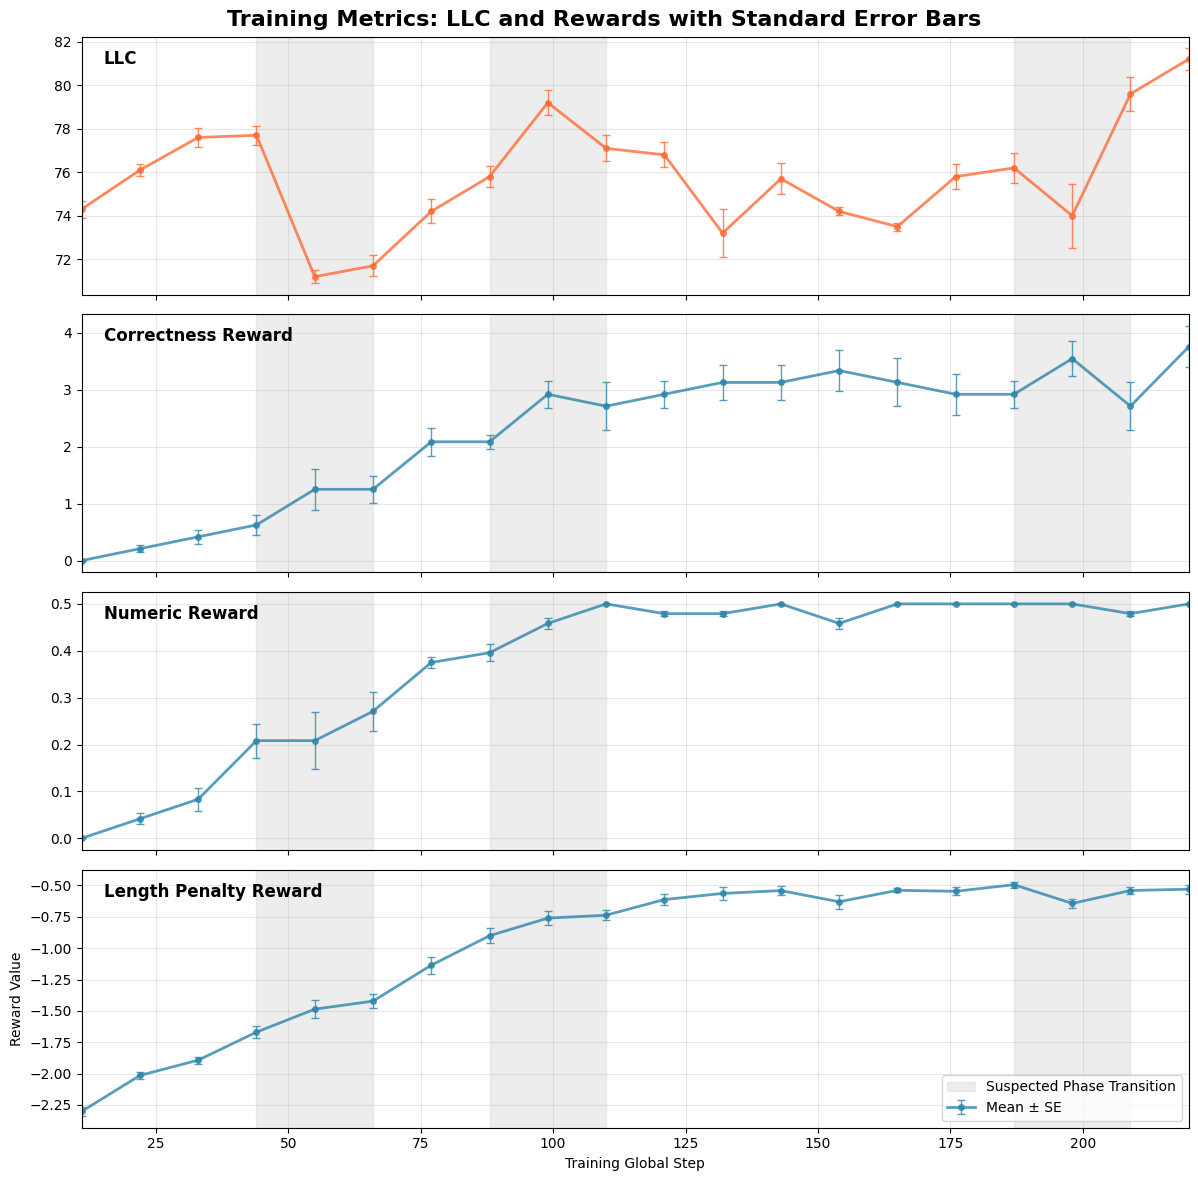

In [5]:
# Create the main plotting function with LLC and reward error bars
def create_reward_plots():
    # Set up the figure with 4 subplots (LLC + 3 reward types)
    fig, axes = plt.subplots(4, 1, figsize=(12, 12))
    fig.suptitle('Training Metrics: LLC and Rewards with Standard Error Bars', fontsize=16, fontweight='bold')
    
    # Colors for consistency
    llc_color = '#FF6B35'  # Orange for LLC
    mean_color = '#2E86AB'  # Blue for rewards
    
    # Plot 0: LLC
    axes[0].errorbar(x_axis_llc, llc_mean, yerr=llc_se, 
                    color=llc_color, linewidth=2, marker='o', markersize=4,
                    capsize=3, capthick=1, elinewidth=1, alpha=0.8,
                    label='LLC ± SE')
    
    # Add shaded regions to LLC plot
    for i, (start, end) in enumerate(TRANSITION_REGIONS):
        label = 'Suspected Phase Transition' if i == 0 else None
        axes[0].axvspan(start, end, color=SHADE_COLOR, alpha=SHADE_ALPHA, label=label)
    
    # Set title on the left side for LLC
    axes[0].text(0.02, 0.95, 'LLC', transform=axes[0].transAxes, 
                fontweight='bold', verticalalignment='top', fontsize=12)
    
    axes[0].grid(True, alpha=0.3)
    axes[0].set_xlim(x_axis_llc.min(), x_axis_llc.max())  # Use LLC x_axis range
    axes[0].tick_params(axis='x', labelbottom=False)  # Remove x-axis labels
    axes[0].set_ylabel('')  # No y-label for top plot
    
    reward_data = [
        ('Correctness Reward', correctness_mean, correctness_se),
        ('Numeric Reward', numeric_mean, numeric_se),
        ('Length Penalty Reward', length_penalty_mean, length_penalty_se)
    ]
    
    for i, (title, mean_data, se_data) in enumerate(reward_data):
        # Plot mean with error bars (i+1 because LLC is at index 0)
        axes[i+1].errorbar(x_axis, mean_data, yerr=se_data, 
                        color=mean_color, linewidth=2, marker='o', markersize=4,
                        capsize=3, capthick=1, elinewidth=1, alpha=0.8,
                        label='Mean ± SE')
        
        # Add shaded regions to reward plots (add label to legend only for the last subplot)
        for j, (start, end) in enumerate(TRANSITION_REGIONS):
            label = 'Suspected Phase Transition' if i == 2 and j == 0 else None
            axes[i+1].axvspan(start, end, color=SHADE_COLOR, alpha=SHADE_ALPHA, label=label)
        
        # Set title on the left side
        axes[i+1].text(0.02, 0.95, title, transform=axes[i+1].transAxes, fontweight='bold', 
                    verticalalignment='top', fontsize=12)
        
        axes[i+1].grid(True, alpha=0.3)
        axes[i+1].set_xlim(x_axis_llc.min(), x_axis_llc.max())  # Use same range as LLC for consistency
        
        # Remove y-axis label for top and middle plots, remove x-axis labels except bottom
        if i < 2:
            axes[i+1].set_ylabel('')
            axes[i+1].tick_params(axis='x', labelbottom=False)
        else:
            axes[i+1].set_ylabel('Reward Value')
            axes[i+1].set_xlabel('Training Global Step')
    
    # Add legend only at the bottom
    axes[-1].legend(loc='lower right', fontsize=10)
    
    # Remove gaps between subplots
    plt.subplots_adjust(hspace=0, top=0.93)
    plt.tight_layout()
    
    return fig

# Create and display the main reward plots with LLC
fig_main = create_reward_plots()
plt.show()

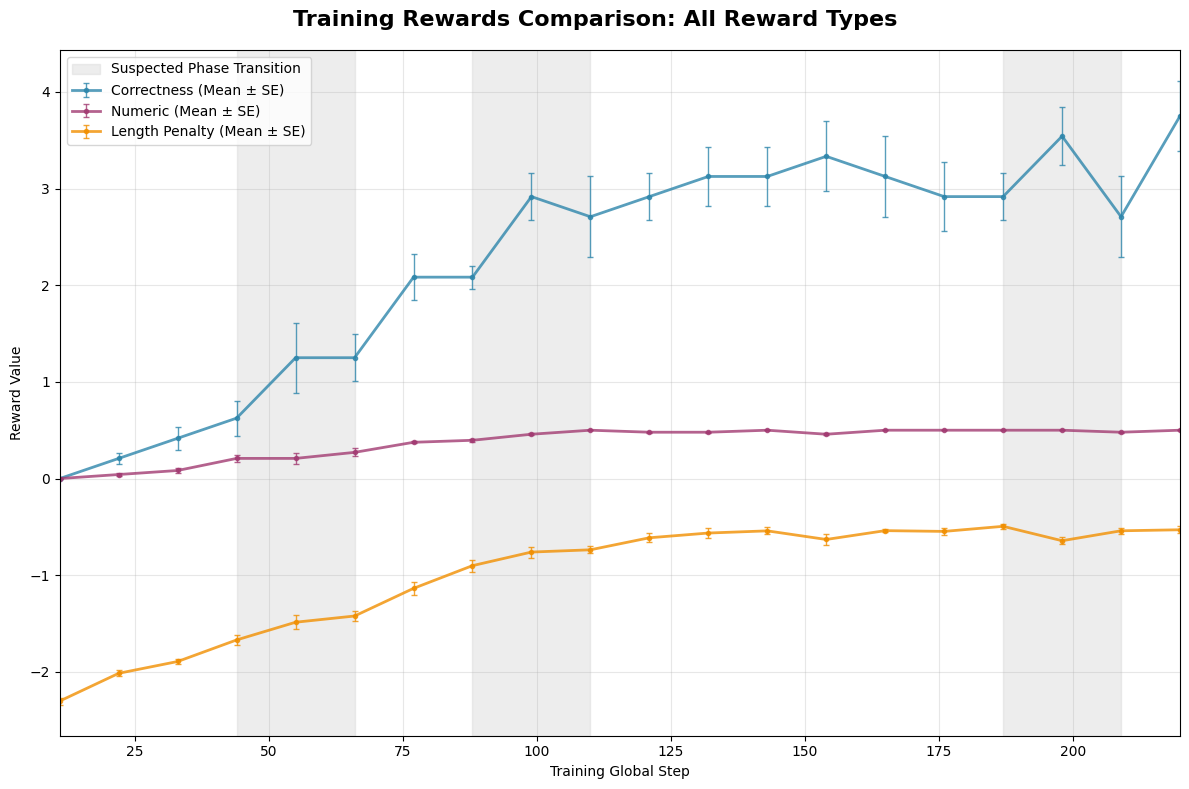

In [6]:
# Alternative: Combined plot with all rewards
def create_compact_reward_plots():
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    fig.suptitle('Training Rewards Comparison: All Reward Types', fontsize=16, fontweight='bold')
    
    # Colors for different rewards
    colors = ['#2E86AB', '#A23B72', '#F18F01']
    
    for i, (start, end) in enumerate(TRANSITION_REGIONS):
        label = 'Suspected Phase Transition' if i == 0 else None
        ax.axvspan(start, end, color=SHADE_COLOR, alpha=SHADE_ALPHA, label=label)
    
    reward_data = [
        ('Correctness', correctness_mean, correctness_se),
        ('Numeric', numeric_mean, numeric_se),
        ('Length Penalty', length_penalty_mean, length_penalty_se)
    ]
    
    for i, (name, mean_data, se_data) in enumerate(reward_data):
        ax.errorbar(x_axis, mean_data, yerr=se_data, 
                   color=colors[i], linewidth=2, marker='o', markersize=3,
                   capsize=2, capthick=1, elinewidth=1, alpha=0.8,
                   label=f'{name} (Mean ± SE)')
    
    ax.set_xlabel('Training Global Step')
    ax.set_ylabel('Reward Value')
    ax.grid(True, alpha=0.3)
    ax.set_xlim(x_axis.min(), x_axis.max())
    ax.legend()
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.93)
    return fig

# Create and display the compact plots
fig_compact = create_compact_reward_plots()
plt.show()

In [7]:
# Load and process accuracy data
def load_accuracy_data():
    # Load the accuracy CSV data
    df_acc = pd.read_csv('wandb_accuracies.csv')
    
    print("Accuracy dataset shape:", df_acc.shape)
    print("\nAccuracy column names (first 10):")
    for i, col in enumerate(df_acc.columns[:10]):
        print(f"  {col}")
    if len(df_acc.columns) > 10:
        print(f"  ... and {len(df_acc.columns) - 10} more columns")
    
    return df_acc

# Extract accuracy data for plotting
def extract_accuracy_data(df_acc):
    x_axis_acc = df_acc['train/global_step']
    
    # Define the conditions: digits (5d, 6d, 7d, 8d) and terms (2t, 3t, 4t)
    digits = ['5d', '6d', '7d', '8d']
    terms = ['2t', '3t', '4t']
    
    accuracy_data = {}
    
    for digit in digits:
        for term in terms:
            # Construct column name pattern
            col_pattern = f"another-working-run - eval/accuracy_pass@1/+_{digit}_{term}"
            
            if col_pattern in df_acc.columns:
                accuracy_data[f"{digit}_{term}"] = df_acc[col_pattern]
                print(f"Found data for {digit}_{term}: {df_acc[col_pattern].min():.3f} to {df_acc[col_pattern].max():.3f}")
            else:
                print(f"Warning: Column {col_pattern} not found")
    
    return x_axis_acc, accuracy_data, digits, terms

# Load the accuracy data
df_acc = load_accuracy_data()
x_axis_acc, accuracy_data, digits, terms = extract_accuracy_data(df_acc)

Accuracy dataset shape: (20, 40)

Accuracy column names (first 10):
  train/global_step
  another-working-run - _step
  another-working-run - _step__MIN
  another-working-run - _step__MAX
  another-working-run - eval/accuracy_pass@1/+_5d_2t
  another-working-run - eval/accuracy_pass@1/+_5d_2t__MIN
  another-working-run - eval/accuracy_pass@1/+_5d_2t__MAX
  another-working-run - eval/accuracy_pass@1/+_5d_3t
  another-working-run - eval/accuracy_pass@1/+_5d_3t__MIN
  another-working-run - eval/accuracy_pass@1/+_5d_3t__MAX
  ... and 30 more columns
Found data for 5d_2t: 0.000 to 1.000
Found data for 5d_3t: 0.000 to 1.000
Found data for 5d_4t: 0.000 to 1.000
Found data for 6d_2t: 0.000 to 1.000
Found data for 6d_3t: 0.000 to 1.000
Found data for 6d_4t: 0.000 to 0.500
Found data for 7d_2t: 0.000 to 1.000
Found data for 7d_3t: 0.000 to 1.000
Found data for 7d_4t: 0.000 to 1.000
Found data for 8d_2t: 0.000 to 1.000
Found data for 8d_3t: 0.000 to 1.000
Found data for 8d_4t: 0.000 to 0.500


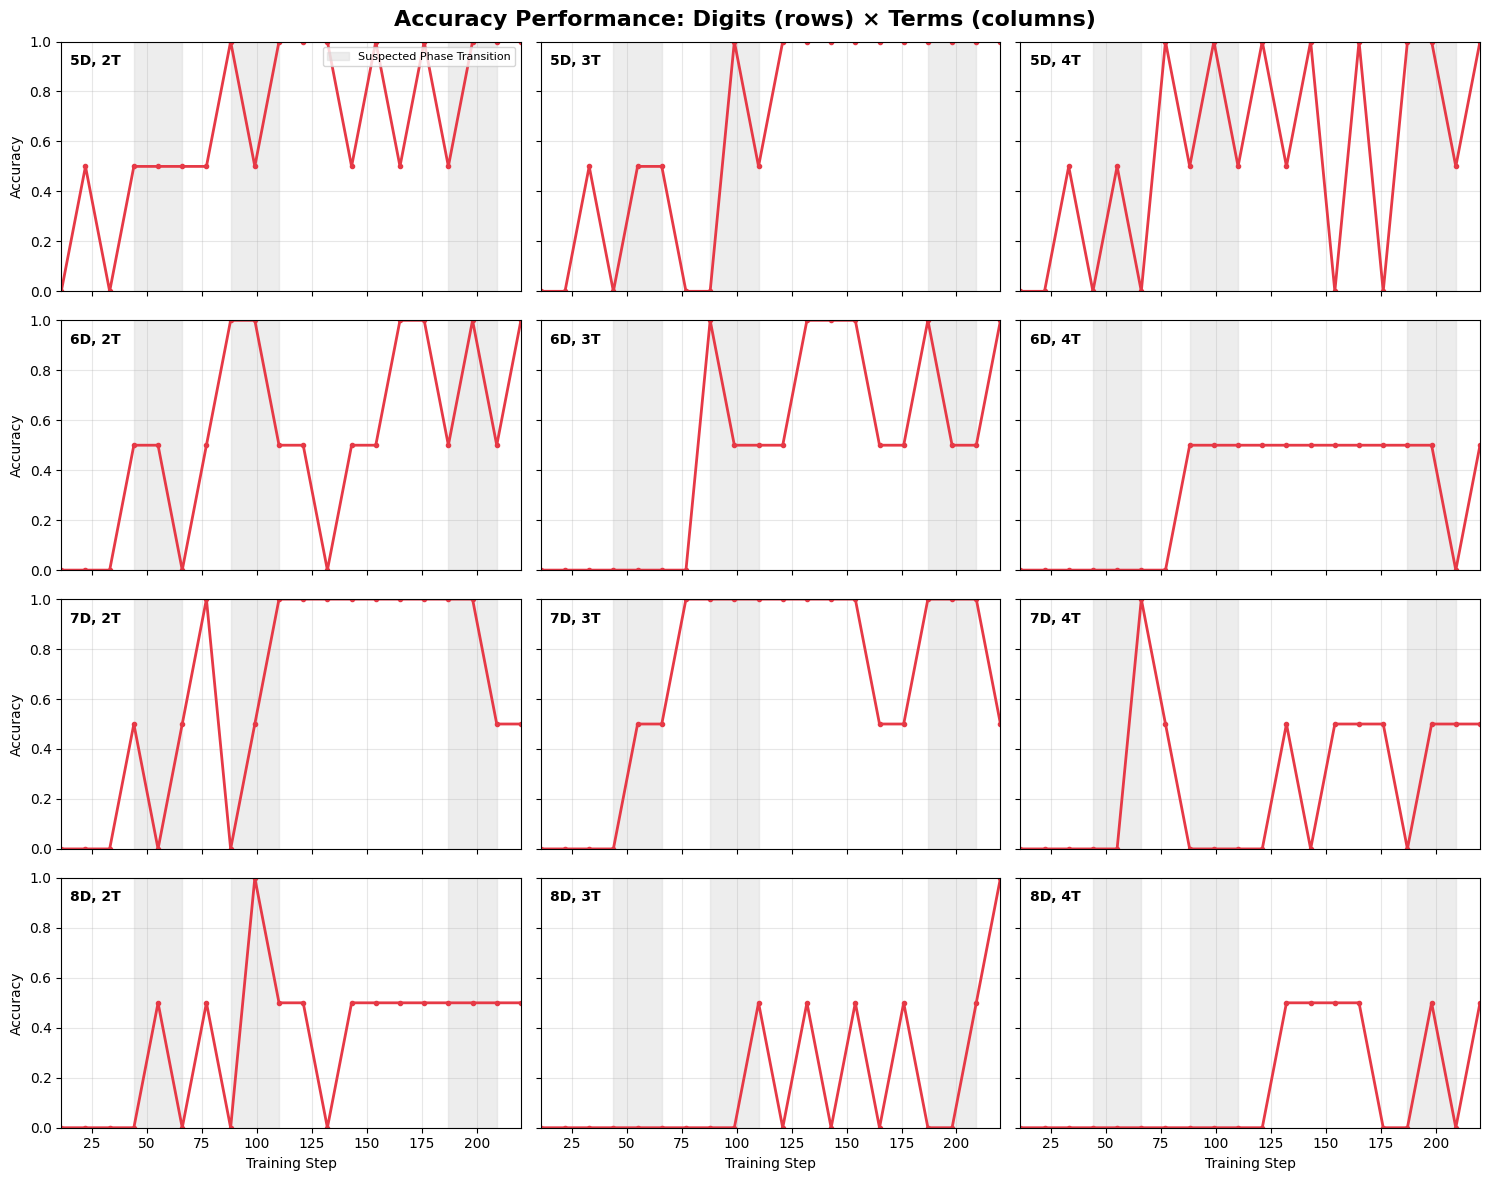

In [8]:
# Create accuracy plots in grid layout
def create_accuracy_plots():
    # Set up the figure with 4x3 grid (4 digit types x 3 term types)
    fig, axes = plt.subplots(4, 3, figsize=(15, 12))
    fig.suptitle('Accuracy Performance: Digits (rows) × Terms (columns)', fontsize=16, fontweight='bold')
    
    # Color for consistency
    acc_color = '#E63946'
    
    legend_added = False  # Track if we've added the legend entry
    
    for i, digit in enumerate(digits):
        for j, term in enumerate(terms):
            key = f"{digit}_{term}"
            
            if key in accuracy_data:
                # Add shaded regions (only add label once for the entire grid)
                for k, (start, end) in enumerate(TRANSITION_REGIONS):
                    label = 'Suspected Phase Transition' if not legend_added and k == 0 else None
                    axes[i, j].axvspan(start, end, color=SHADE_COLOR, alpha=SHADE_ALPHA, label=label)
                    if label:
                        legend_added = True
                
                # Plot accuracy
                axes[i, j].plot(x_axis_acc, accuracy_data[key], 
                               color=acc_color, linewidth=2, marker='o', markersize=3)
                
                # Set title for each subplot
                axes[i, j].text(0.02, 0.95, f'{digit.upper()}, {term.upper()}', 
                               transform=axes[i, j].transAxes, fontweight='bold', 
                               verticalalignment='top', fontsize=10)
                
                axes[i, j].grid(True, alpha=0.3)
                axes[i, j].set_xlim(x_axis_acc.min(), x_axis_acc.max())
                axes[i, j].set_ylim(0, 1)  # Accuracy is typically 0-1
                
                # Remove x-axis labels except for bottom row
                if i < 3:
                    axes[i, j].tick_params(axis='x', labelbottom=False)
                else:
                    axes[i, j].set_xlabel('Training Step')
                
                # Remove y-axis labels except for leftmost column
                if j > 0:
                    axes[i, j].tick_params(axis='y', labelleft=False)
                else:
                    axes[i, j].set_ylabel('Accuracy')
            else:
                # Hide subplot if no data available
                axes[i, j].set_visible(False)
    
    # Add legend to the first visible subplot
    if legend_added:
        axes[0, 0].legend(loc='upper right', fontsize=8)
    
    # Remove gaps between subplots
    plt.subplots_adjust(hspace=0.1, wspace=0.05, top=0.93)
    plt.tight_layout()
    
    return fig

# Create and display the accuracy plots
fig_accuracy = create_accuracy_plots()
plt.show()

In [10]:
# Updated save plots function to include accuracy plots
def save_all_plots():
    # Create and save the reward error bar plots
    fig1 = create_reward_plots()
    fig1.savefig('reward_plots_error_bars.png', dpi=300, bbox_inches='tight')
    print("Saved: reward_plots_error_bars.png")
    
    # Create and save the combined reward plot
    fig2 = create_compact_reward_plots()
    fig2.savefig('reward_plots_combined.png', dpi=300, bbox_inches='tight')
    print("Saved: reward_plots_combined.png")
    
    # Create and save the accuracy grid plot
    fig3 = create_accuracy_plots()
    fig3.savefig('accuracy_plots_grid.png', dpi=300, bbox_inches='tight')
    print("Saved: accuracy_plots_grid.png")
    
    plt.close(fig1)
    plt.close(fig2)
    plt.close(fig3)

# Display comprehensive summary statistics
def display_comprehensive_stats():
    print("COMPREHENSIVE SUMMARY STATISTICS")
    print("=" * 60)
    
    # LLC statistics
    print("\nLLC STATISTICS:")
    print("-" * 30)
    print(f"  Mean - Min: {llc_mean.min():.4f}, Max: {llc_mean.max():.4f}, Final: {llc_mean.iloc[-1]:.4f}")
    print(f"  Std  - Min: {llc_se.min():.4f}, Max: {llc_se.max():.4f}, Final: {llc_se.iloc[-1]:.4f}")
    
    # Reward statistics
    print("\nREWARD STATISTICS:")
    print("-" * 30)
    rewards_data = [
        ("Correctness Reward", correctness_mean, correctness_std),
        ("Numeric Reward", numeric_mean, numeric_std),
        ("Length Penalty Reward", length_penalty_mean, length_penalty_std)
    ]
    
    for name, mean_data, std_data in rewards_data:
        print(f"\n{name}:")
        print(f"  Mean - Min: {mean_data.min():.4f}, Max: {mean_data.max():.4f}, Final: {mean_data.iloc[-1]:.4f}")
        print(f"  Std  - Min: {std_data.min():.4f}, Max: {std_data.max():.4f}, Final: {std_data.iloc[-1]:.4f}")
    
    # Accuracy statistics
    print("\nACCURACY STATISTICS:")
    print("-" * 30)
    for digit in digits:
        print(f"\n{digit.upper()} Digits:")
        for term in terms:
            key = f"{digit}_{term}"
            if key in accuracy_data:
                acc_data = accuracy_data[key]
                print(f"  {term.upper()} - Min: {acc_data.min():.4f}, Max: {acc_data.max():.4f}, Final: {acc_data.iloc[-1]:.4f}")
    
    print(f"\nTraining steps: {x_axis.min()} to {x_axis.max()} ({len(x_axis)} data points)")
    print(f"LLC steps: {x_axis_llc.min()} to {x_axis_llc.max()} ({len(x_axis_llc)} data points)")

# Display comprehensive statistics
display_comprehensive_stats()

# Save all plots with high DPI
save_all_plots()

COMPREHENSIVE SUMMARY STATISTICS

LLC STATISTICS:
------------------------------
  Mean - Min: 71.2000, Max: 81.2000, Final: 81.2000
  Std  - Min: 0.1837, Max: 1.4697, Final: 0.4899

REWARD STATISTICS:
------------------------------

Correctness Reward:
  Mean - Min: 0.0000, Max: 3.7500, Final: 3.7500
  Std  - Min: 0.0000, Max: 2.0624, Final: 1.7678

Numeric Reward:
  Mean - Min: 0.0000, Max: 0.5000, Final: 0.5000
  Std  - Min: 0.0000, Max: 0.2946, Final: 0.0000

Length Penalty Reward:
  Mean - Min: -2.3017, Max: -0.4942, Final: -0.5300
  Std  - Min: 0.0806, Max: 0.3560, Final: 0.1787

ACCURACY STATISTICS:
------------------------------

5D Digits:
  2T - Min: 0.0000, Max: 1.0000, Final: 1.0000
  3T - Min: 0.0000, Max: 1.0000, Final: 1.0000
  4T - Min: 0.0000, Max: 1.0000, Final: 1.0000

6D Digits:
  2T - Min: 0.0000, Max: 1.0000, Final: 1.0000
  3T - Min: 0.0000, Max: 1.0000, Final: 1.0000
  4T - Min: 0.0000, Max: 0.5000, Final: 0.5000

7D Digits:
  2T - Min: 0.0000, Max: 1.0000, Fina